In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read all data
df = pd.read_csv('../DAiSEE/Labels/AllLabels.csv')
df

,ClipID,Boredom,Engagement,Confusion,Frustration
0,1100011002.avi,0,2,0,0
1,1100011003.avi,0,2,0,0
2,1100011004.avi,0,3,0,0
3,1100011005.avi,0,3,0,0
4,1100011006.avi,0,3,0,0
...,...,...,...,...,...
8920,9877360164.avi,1,3,0,0
8921,9877360165.avi,0,3,0,0
8922,9877360166.avi,1,3,0,2
8923,9877360168.avi,1,3,1,1


In [3]:
# View quantity of students
df['StudentID'] = df['ClipID'].astype(str).str[:6]
print('Number of students:', df['StudentID'].nunique())

Number of students: 112


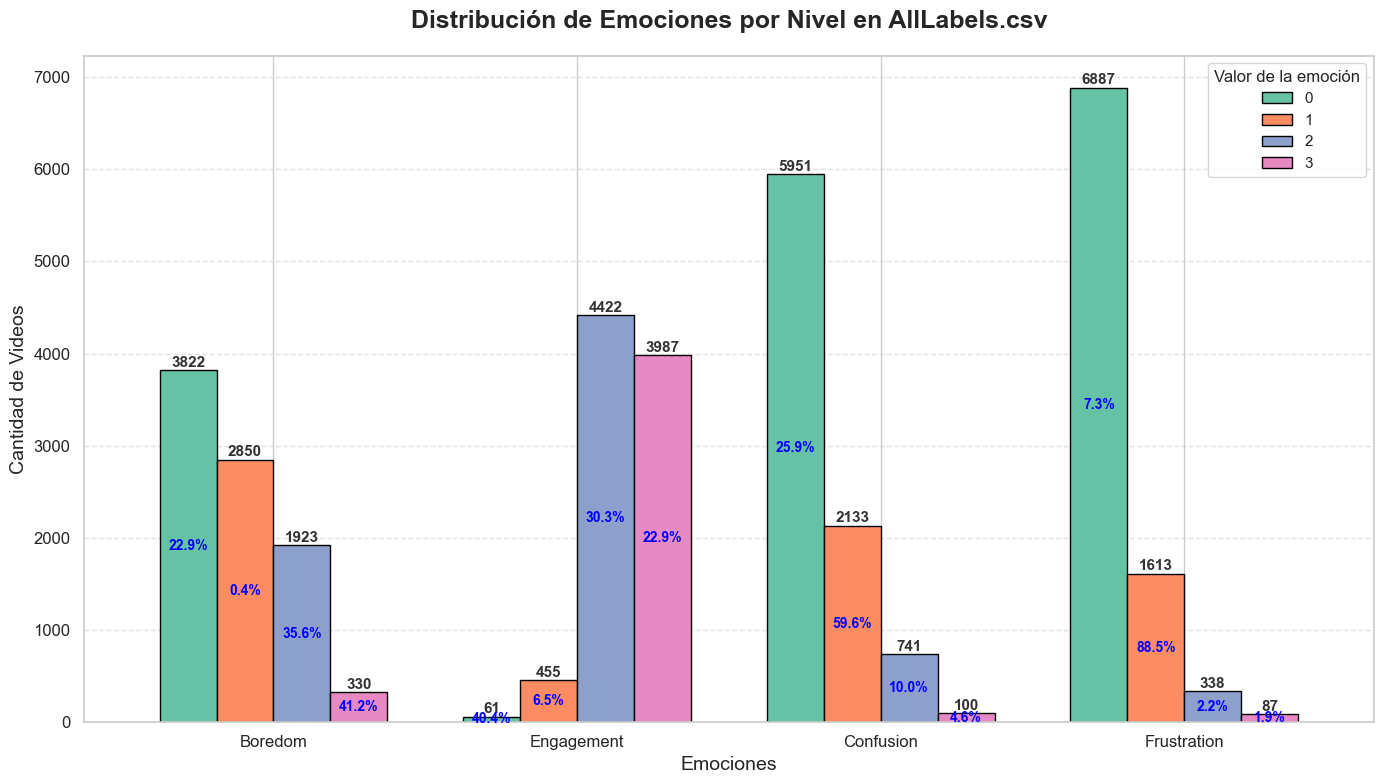

In [5]:
# Plot distribution of emotions
emotion_counts = pd.DataFrame({
    'Boredom': df['Boredom'].value_counts(),
    'Engagement': df['Engagement'].value_counts(),
    'Confusion': df['Confusion'].value_counts(),
    'Frustration': df['Frustration '].value_counts()
}).fillna(0).astype(int)

emotion_percentages = emotion_counts.div(emotion_counts.sum(axis=1), axis=0) * 100
emotion_counts = emotion_counts.T
emotion_percentages = emotion_percentages.T

colors = sns.color_palette("Set2", n_colors=len(emotion_counts.columns))
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
bars = emotion_counts.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.75)

for container, emotion in zip(ax.containers, emotion_counts.index):
    for bar, percentage in zip(container, emotion_percentages.loc[emotion]):
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2

        ax.text(x, height + 1.5, f'{int(height)}',
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='#333333')

        ax.text(x, height / 2, f'{percentage:.1f}%',
                ha='center', va='center',
                fontsize=10, color='blue' if height > 10 else '#333333', fontweight='bold')

ax.set_title('Distribución de Emociones por Nivel en AllLabels.csv', fontsize=18, weight='bold', pad=20)
ax.set_xlabel('Emociones', fontsize=14)
ax.set_ylabel('Cantidad de Videos', fontsize=14)
ax.set_xticklabels(emotion_counts.index, rotation=0, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Valor de la emoción', fontsize=11, title_fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

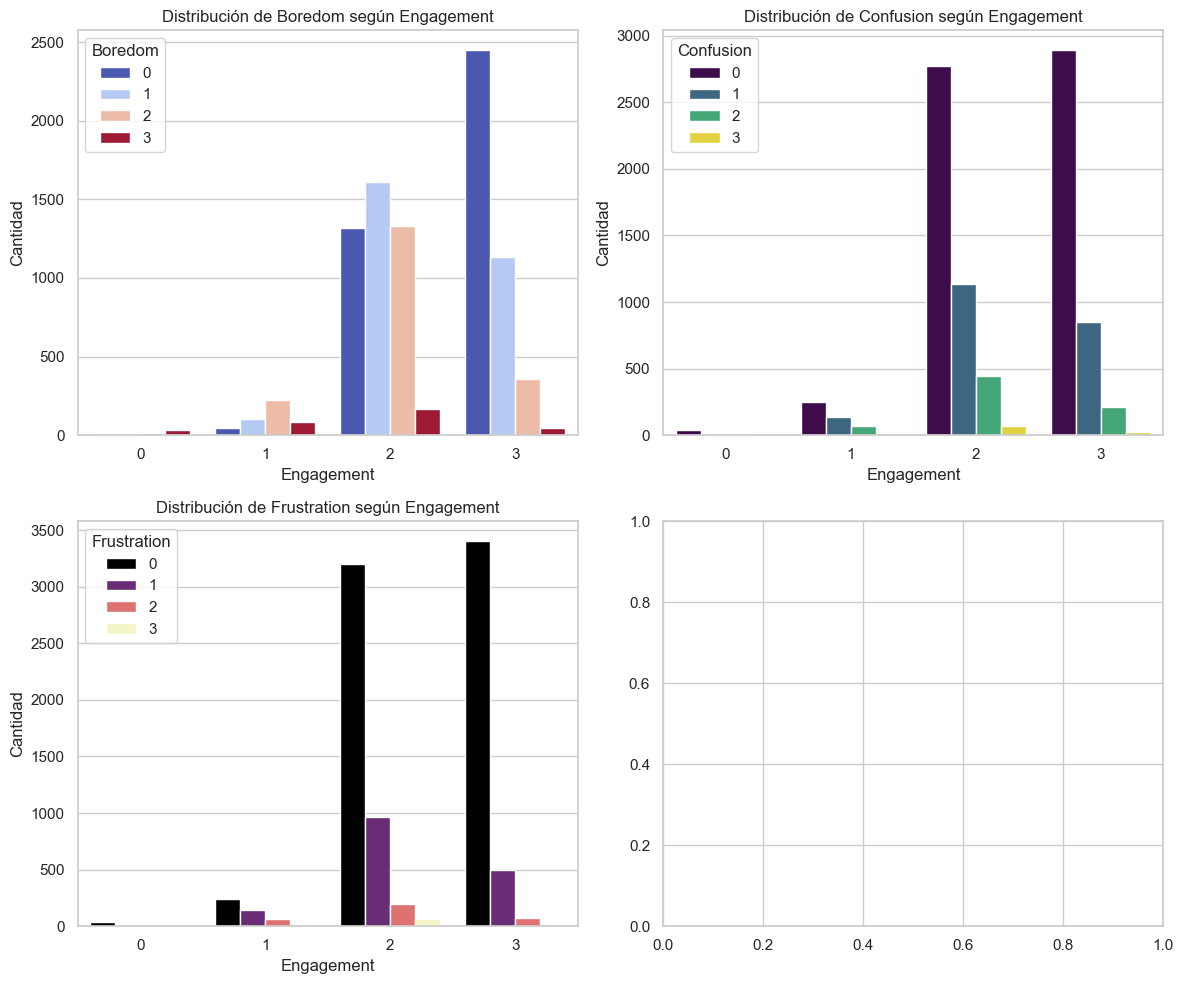

In [7]:
# Plot distribution of each level of Emotions by Engagement
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data=df, x='Engagement', hue='Boredom', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Distribución de Boredom según Engagement')
axes[0, 0].set_xlabel('Engagement')
axes[0, 0].set_ylabel('Cantidad')
axes[0, 0].legend(title='Boredom')

sns.countplot(data=df, x='Engagement', hue='Confusion', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribución de Confusion según Engagement')
axes[0, 1].set_xlabel('Engagement')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].legend(title='Confusion')

sns.countplot(data=df, x='Engagement', hue='Frustration ', ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Distribución de Frustration según Engagement')
axes[1, 0].set_xlabel('Engagement')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].legend(title='Frustration')

plt.tight_layout()
plt.show()

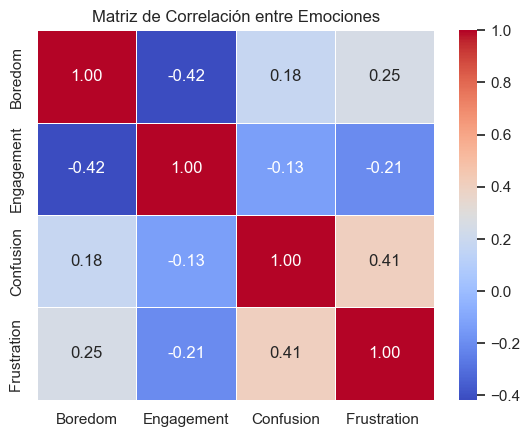

In [8]:
# Correlation Matrix
corr_matrix = df[['Boredom', 'Engagement', 'Confusion', 'Frustration ']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Emociones')
plt.show()